### *GET AROUND PRICE OPTIMIZATION* ###

### *Imports & Load* ###

In [45]:
#!pip install pip install feature-engine

In [46]:
import pandas as pd
import numpy as np
import joblib

import sklearn 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error

import xgboost
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.offline as pyo
import plotly.offline as py
import plotly.tools as tls


In [47]:
data = pd.read_csv("get_around_pricing_project.csv", index_col=0)
data.head()

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183


### *EDA* ###

In [48]:
# Basic stats
print("Number of rows : {}".format(data.shape[0]))
print()

print("Display of dataset: ")
display(data.head())
print()

print("Basics statistics: ")
data_desc = data.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*data.isnull().sum()/data.shape[0])

Number of rows : 4843

Display of dataset: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183



Basics statistics: 


,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000



Percentage of missing values: 


model_key                    0.0
mileage                      0.0
engine_power                 0.0
fuel                         0.0
paint_color                  0.0
car_type                     0.0
private_parking_available    0.0
has_gps                      0.0
has_air_conditioning         0.0
automatic_car                0.0
has_getaround_connect        0.0
has_speed_regulator          0.0
winter_tires                 0.0
rental_price_per_day         0.0
dtype: float64

[Text(0.5, 1.0, 'Target visualization')]

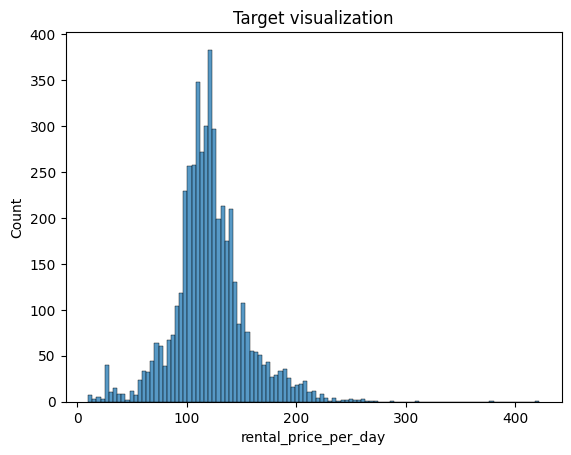

In [49]:
# Target visualization
sns.histplot(x=data['rental_price_per_day']).set(title="Target visualization")

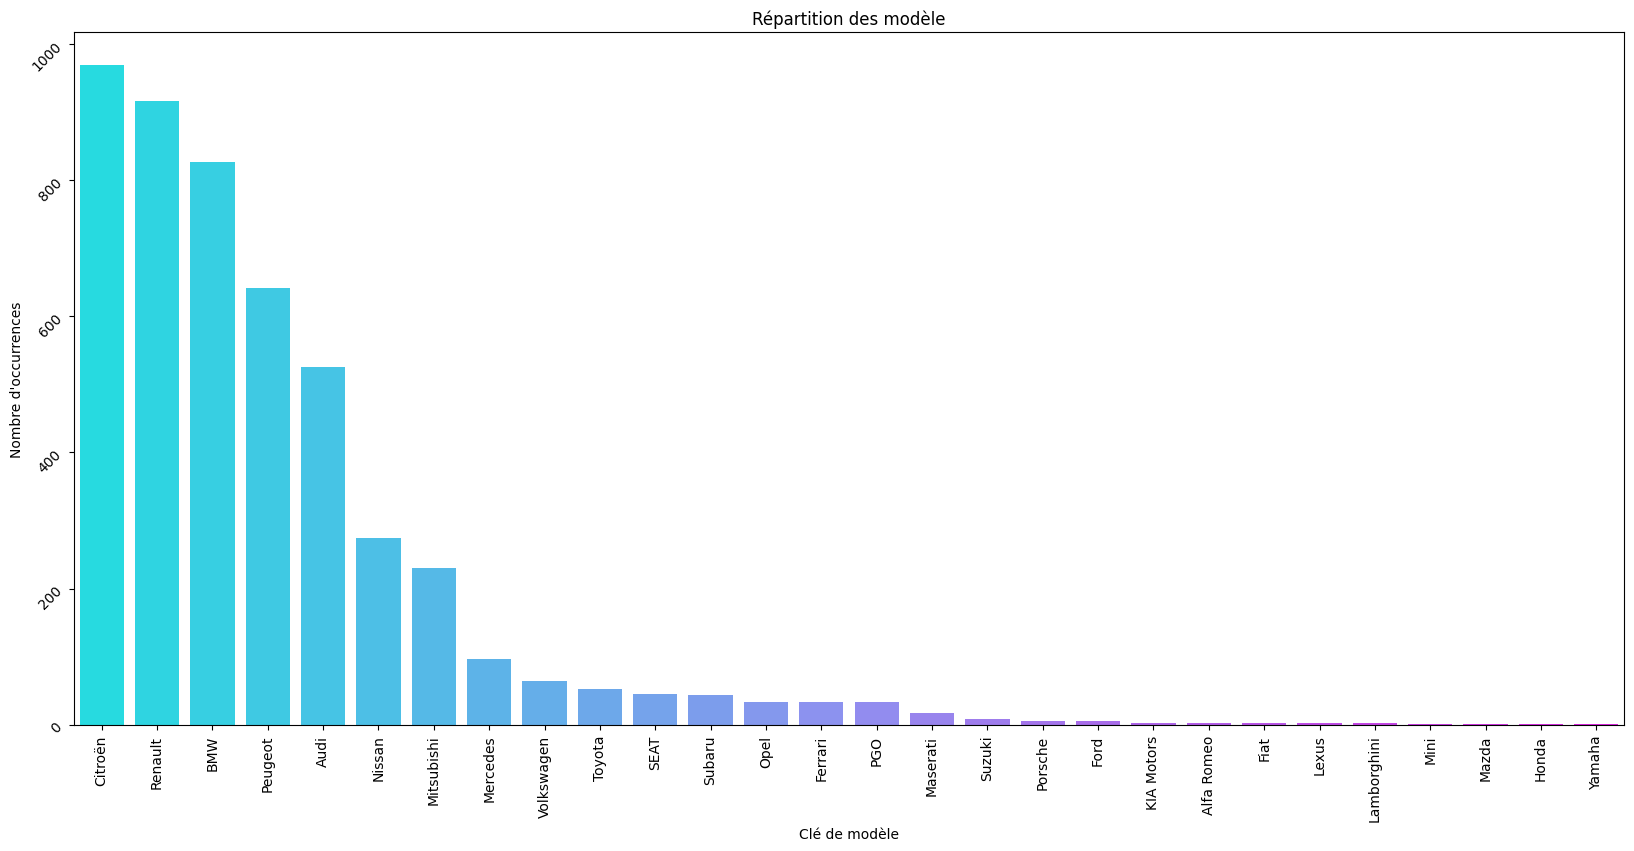

In [50]:
# modeles de voiture 
fig = plt.figure(figsize=(20, 9))
sns.countplot(x="model_key", data=data, palette="cool", order=data["model_key"].value_counts().index)
plt.title("Répartition des modèle")
plt.xlabel("Clé de modèle")
plt.ylabel("Nombre d'occurrences")
plt.xticks(rotation=90)
plt.yticks(rotation=45, )
plt.show()

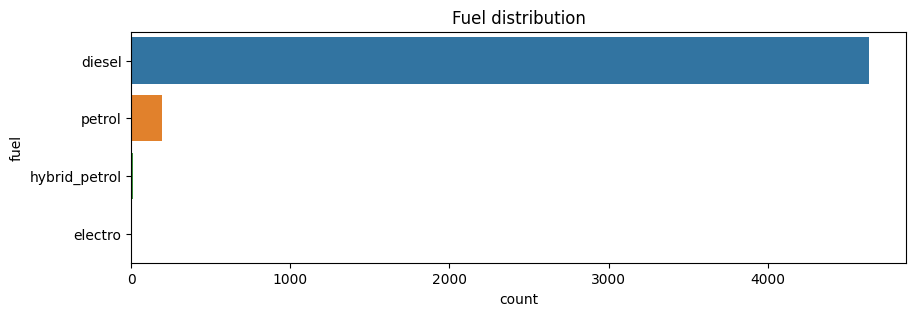

In [51]:
# Fuel distribution
fig = plt.figure(figsize = (10,3))
fig = sns.countplot(y= "fuel", data = data, order = data["fuel"].value_counts().index).set(title="Fuel distribution")


### *XGBOOST* ### 

In [52]:
# Separate target variable Y from features X
print("Separating labels from features...")
target_variable = "rental_price_per_day"

X = data.drop(target_variable, axis = 1)
Y = data.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    106
1    264
2    101
3    158
4    183
Name: rental_price_per_day, dtype: int64

X :
  model_key  mileage  engine_power    fuel paint_color     car_type  \
0   Citroën   140411           100  diesel       black  convertible   
1   Citroën    13929           317  petrol        grey  convertible   
2   Citroën   183297           120  diesel       white  convertible   
3   Citroën   128035           135  diesel         red  convertible   
4   Citroën    97097           160  diesel      silver  convertible   

   private_parking_available  has_gps  has_air_conditioning  automatic_car  \
0                       True     True                 False          False   
1                       True     True                 False          False   
2                      False    False                 False          False   
3                       True     True                 False          False   
4                       True     True     

In [53]:
# Automatically detect names of numeric/categorical columns
numeric_features = []
categorical_features = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
    else :
        categorical_features.append(i)

print('Found numeric features ', numeric_features)
print('Found categorical features ', categorical_features)

Found numeric features  ['mileage', 'engine_power']
Found categorical features  ['model_key', 'fuel', 'paint_color', 'car_type', 'private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']


<ipython-input-53-0f0a515c43b5>:4: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [54]:
numeric_features

['mileage', 'engine_power']

In [55]:
categorical_features

['model_key',
 'fuel',
 'paint_color',
 'car_type',
 'private_parking_available',
 'has_gps',
 'has_air_conditioning',
 'automatic_car',
 'has_getaround_connect',
 'has_speed_regulator',
 'winter_tires']

In [56]:
# Rare encoding
# Définir les variables pour lesquelles vous souhaitez effectuer un encodage rare
variables_to_encode = ["paint_color", "model_key"]

# Déterminer le seuil pour considérer une catégorie comme rare
rare_threshold = 0.01

# Déterminer le nombre de catégories à inclure avant de remplacer les autres par "Other"
num_categories_to_keep = 5

# Effectuer l'encodage rare pour chaque variable
for variable in variables_to_encode:
    # Compter le nombre d'occurrences de chaque catégorie
    value_counts = X[variable].value_counts()

    # Identifier les catégories rares ou moins fréquentes
    rare_categories = value_counts[value_counts <= rare_threshold * len(X)].index

    # Garder uniquement les premières catégories les plus fréquentes
    top_categories = value_counts.head(num_categories_to_keep).index

    # Remplacer les catégories rares par "Other"
    X[variable] = X[variable].apply(lambda x: x if x in top_categories else "Other")

In [57]:
# Divide dataset Train set & Test set 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [58]:
# Create pipeline for numeric features
numeric_transformer = StandardScaler()

# Create pipeline for categorical features
categorical_transformer = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')


## Combine the transformers into a single object / Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numeric_transformer, numeric_features)
        ])

In [59]:
model = Pipeline(steps=[
        ("Preprocessing", preprocessor),
        ("Regressor",XGBRegressor(learning_rate= 0.1, max_depth= 7, min_child_weight= 7, n_estimators= 170, n_jobs=1))
    ])

In [60]:
model.fit(X_train, Y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print("r2 on train set : ", r2_score(Y_train, train_pred))
print("r2 on test set : ", r2_score(Y_test, test_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



r2 on train set :  0.9094581547421815
r2 on test set :  0.775010683593502


### *Saving the model* ###

In [61]:
# dumping model
from joblib import dump, load
dump(model, 'modele2.joblib')

['modele2.joblib']

In [62]:
#from google.colab import drive
#drive.mount('/content/drive')

In [63]:
#save_path = '/content/drive/MyDrive/Models/model_xgboost.h5'


In [64]:
# dumping model
#from joblib import dump, load
#dump(model, 'model_xgboost1.joblib')